In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
from matplotlib import ticker
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)

def cm2inch(value):
    return value/2.54
plt.rcParams['figure.figsize'] = (cm2inch(8), cm2inch(6.5))
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] =6

from matplotlib import rcParams
config = {
    "text.usetex": False,
    "font.family":'serif',
    # "font.family":'stix',
    "font.size": 8,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)

from mpl_toolkits.mplot3d import Axes3D
import numpy 
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label,fillstyle='full')
    # legend_font = {
    # 'family': 'Times New Roman',
    # 'style':'normal',
    # 'size':10,
    # 'weight': "bold",
    # }
    label_legend = ax.legend(handles=[line],
                             loc=[-0.2,1.0005],
                             handlelength=0.0,
                             handleheight=0.0,
                             handletextpad=0.0,
                             borderaxespad=0.0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def setlabelm(ax, label, loc, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=loc,
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def sciforyax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)
def sciforxax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.xaxis.set_major_formatter(formatter)
cbformat=ticker.ScalarFormatter(useMathText=True,useOffset=True)
cbformat.set_powerlimits((-1,1))

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%.3f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat 
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format

levels=100
figureDPI=1200
figureType="jpeg"
timeUnit="fs"

In [2]:
dir="D:\\mplot\\"
print('Working directory',dir)
print("\n")
import os
os.startfile(dir)

Working directory D:\mplot\




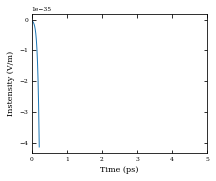

In [3]:
data=np.loadtxt(dir+"pulse.dat")
x=data[:,0]
y=data[:,1]
plt.plot(x,y)
plt.xlim(0,5)
plt.xlabel("Time (ps)")
plt.ylabel("Instensity (V/m)")
plt.savefig(dir+"pulse."+figureType,bbox_inches = 'tight',dpi=figureDPI)

<Figure size 576x432 with 0 Axes>

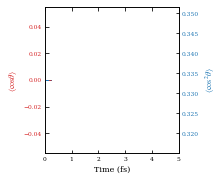

In [4]:
# %%
plt.figure(figsize=(8,6))
data=np.loadtxt(dir+"ori+ali.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('$\\langle{\\rm  cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(0, 5)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle{\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"AlignmentAndOrientation.jpeg",bbox_inches = 'tight',dpi=600)
plt.show()

In [5]:
data =np.loadtxt(dir+"pop_j_t.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
# print('nx= ',nx,' ny= ',ny)
# print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
# print('x[50]',x[50])
# print(x[0])
# print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
# setlabel(ax1,"(a)")
plt.xlim(x[0]/2,max(x)-x[0])
plt.ylim(-0.5,5.5)
plt.xlabel('Time (ps)')
plt.ylabel('$J$')
plt.colorbar(format=cbformat)
plt.savefig(dir+"pop_j_."+figureType,bbox_inches = 'tight',dpi=figureDPI)

C:\Users\ablis\AppData\Local\Temp\ipykernel_7156\1853220900.py:1: UserWarning: loadtxt: Empty input file: "D:\mplot\pop_j_t.dat"
  data =np.loadtxt(dir+"pop_j_t.dat")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed